# Cleaning the ACS Files
#### Jameson Carter
#### 11/21/2021
The following file evaluates the ACS shapefiles that we have generated using getACS.py. We check for missing values, makes some basic plots evaluating the data across the city, and perform other basic checks. Additionally, we pare the dataset down to only contain results from the city of Chicago.

The dataset ACSData contains all of the Census tracts for Cook County, and 5 year averages for a variety of demographic and other variables. These variables were selected using the data profiles variables presented on this site: https://api.census.gov/data/2019/acs/acs5/profile/variables.html

In [29]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely import wkt

In [18]:
ACSData = pd.read_csv('C:/Users/jacar/OneDrive/Documents/chicago-complaints/data/ACSFile.csv')

In [19]:
ACSData.isnull().sum()

geo_id         0
DP02_0002PE    4
DP02_0004PE    4
DP02_0006PE    4
DP02_0010PE    4
              ..
DP05_0038PE    4
DP05_0044PE    4
DP05_0058PE    4
DP05_0071PE    4
geometry       1
Length: 100, dtype: int64

In [20]:
print(f'Before dropping Nulls, the dataset had {len(ACSData)} observations')
ACSData = ACSData.dropna()
print(f'After dropping Nulls, the dataset had {len(ACSData)} observations')

Before dropping Nulls, the dataset had 1319 observations
After dropping Nulls, the dataset had 1300 observations


In [31]:
ACSData['geometry'] = gpd.GeoSeries.from_wkt(ACSData['geometry'])

In [33]:
ACSGeoData = gpd.GeoDataFrame(ACSData, geometry='geometry')

<AxesSubplot:>

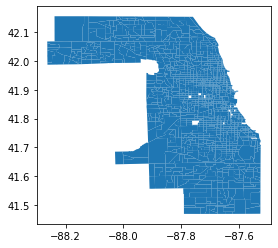

In [34]:
ACSGeoData.plot()